<a href="https://colab.research.google.com/github/Lucie123456789/automate/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, accuracy_score,
    roc_curve, auc
)

In [6]:
from google.colab import files
uploaded = files.upload()


Saving track_data_final.csv to track_data_final.csv


In [7]:
df = pd.read_csv("track_data_final.csv")
df.head()

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type;
0,6pymOcrCnMuCWdgGVTvUgP,3,57.0,61,213173.0,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58.0,compilation;
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1.0,67,158760.0,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1.0,single;
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11.0,63,225328.0,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26.0,album;
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2.0,72,158463.0,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16.0,album;
4,0GLfodYacy3BJE7AI3A8en,Man Down,7.0,57,267013.0,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13.0,album;


In [27]:
df = pd.read_csv("track_data_final.csv")

# Corriger le nom de colonne bizarre
df.rename(columns={'album_type;': 'album_type'}, inplace=True)

In [8]:
df.shape
df.dtypes

,0
track_id,object
track_name,object
track_number,float64
track_popularity,object
track_duration_ms,float64
explicit,object
artist_name,object
artist_popularity,float64
artist_followers,float64
artist_genres,object


In [9]:
df.isna().sum()

,0
track_id,0
track_name,2265
track_number,2263
track_popularity,2263
track_duration_ms,2270
explicit,2270
artist_name,2274
artist_popularity,2274
artist_followers,2274
artist_genres,2274


In [10]:
df[['track_popularity','artist_popularity','track_duration_ms']].describe()

,artist_popularity,track_duration_ms
count,6504.000000,6508.000000
mean,69.891451,207171.602336
std,20.726685,59121.866484
min,0.000000,0.000000
25%,59.000000,173381.000000
50%,75.000000,205427.500000
75%,85.000000,235603.250000
max,100.000000,692280.000000


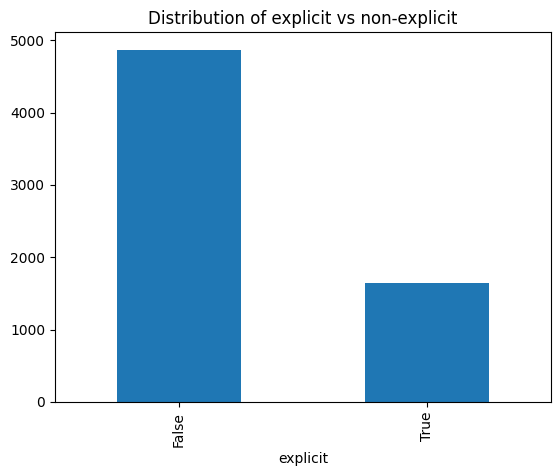

In [14]:
df['explicit'].value_counts(normalize=True)
df['explicit'].value_counts().plot(kind='bar')
plt.title("Distribution of explicit vs non-explicit")
plt.show()

In [15]:
df[['track_popularity', 'explicit']].dtypes

,0
track_popularity,object
explicit,object


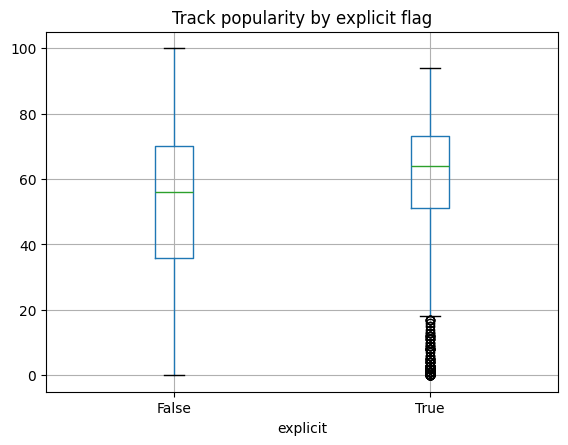

In [19]:
df.boxplot(column='track_popularity', by='explicit')
plt.title("Track popularity by explicit flag")
plt.suptitle("")
plt.show()


In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Colonnes numériques et catégorielles réelles
num_cols = ['track_popularity', 'track_duration_ms',
            'artist_popularity', 'artist_followers']

cat_cols = ['artist_genres', 'album_name', 'album_type']

# S'assurer que les colonnes numériques sont bien numériques
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [30]:
# Convertir explicit en numérique (0/1) en gérant les valeurs bizarres
df['explicit'] = pd.to_numeric(df['explicit'], errors='coerce')

# Supprimer les lignes où explicit est manquant
df = df.dropna(subset=['explicit'])

# Conversion finale en int
df['explicit'] = df['explicit'].astype(int)


In [31]:
# Imputation numérique par médiane
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputation catégorielle par "Unknown"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [32]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [33]:
# Créer main_genre uniquement si elle n'existe pas déjà
if 'main_genre' not in df.columns:
    df['main_genre'] = df['artist_genres'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
    )

# One-hot encoding sur album_type et main_genre
df = pd.get_dummies(df, columns=['album_type', 'main_genre'], drop_first=True)


In [34]:
df.head()
df.dtypes


,0
track_id,object
track_name,object
track_number,float64
track_popularity,float64
track_duration_ms,float64
...,...
main_genre_['uk grime'],bool
main_genre_['west coast hip hop'],bool
main_genre_['witch house'],bool
main_genre_['yacht rock'],bool


In [35]:
X = df.drop(columns=['explicit'])
y = df['explicit']


In [36]:
X = df.drop(columns=['explicit'])
y = df['explicit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
# 1. colonnes numériques déjà définies
num_cols = ['track_popularity', 'track_duration_ms',
            'artist_popularity', 'artist_followers']

# 2. autre colonne numérique utile
extra_num = ['album_total_tracks']

# 3. colonnes créées par get_dummies (one-hot) pour album_type et main_genre
dummy_cols = [col for col in df.columns
              if col.startswith('album_type_') or col.startswith('main_genre_')]

# 4. toutes les features qu'on garde pour le modèle (que des numériques)
feature_cols = num_cols + extra_num + dummy_cols

len(feature_cols), feature_cols[:10]  # juste pour vérifier


(185,
 ['track_popularity',
  'track_duration_ms',
  'artist_popularity',
  'artist_followers',
  'album_total_tracks',
  'album_type_album;',
  'album_type_compilation',
  'album_type_compilation;',
  'album_type_single',
  'album_type_single;'])

In [39]:
X = df[feature_cols]          # uniquement colonnes numériques
y = df['explicit'].astype(int)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [43]:
knn_model = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance'
)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7, weights='distance')

In [45]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    print(f"\n===== {model_name} =====")
    preds = model.predict(X_test)

    # Certains modèles (ex: DecisionTree, RandomForest) ont predict_proba
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    # KNN a aussi predict_proba si weights='distance' ou à défaut decision_function
    else:
        probs = preds  # fallback pour éviter erreurs

    # Classification metrics
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

    # ROC Curve
    try:
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
        plt.plot([0,1],[0,1],'--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve — {model_name}")
        plt.legend()
        plt.show()

    except Exception as e:
        roc_auc = None
        print("AUC not available:", e)

    return roc_auc



===== Decision Tree =====
Accuracy: 0.7956989247311828
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       974
           1       0.64      0.44      0.52       328

    accuracy                           0.80      1302
   macro avg       0.73      0.68      0.69      1302
weighted avg       0.78      0.80      0.78      1302



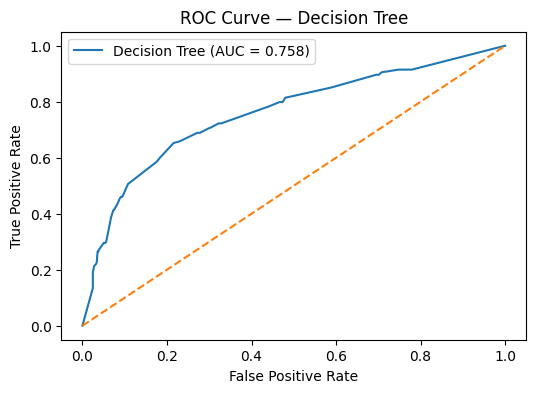


===== KNN =====
Accuracy: 0.7741935483870968
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       974
           1       0.58      0.39      0.46       328

    accuracy                           0.77      1302
   macro avg       0.70      0.65      0.66      1302
weighted avg       0.75      0.77      0.76      1302



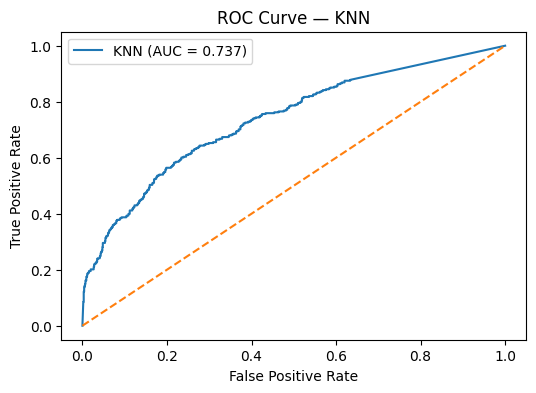

In [46]:
auc_tree = evaluate_model(tree_model, X_test, y_test, "Decision Tree")
auc_knn  = evaluate_model(knn_model,  X_test, y_test, "KNN")
